
# Abdelrahman Mostafa Sophy Mohamed
# The Sparks Foundation
# Data Science and Buisness Analytics intern
# Task_1
# Prediction using Supervised ML

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [62]:
df=pd.read_csv('dataset_1.csv')
df.head()

,"Hours,Scores"
0,"2.5,21"
1,"5.1,47"
2,"3.2,27"
3,"8.5,75"
4,"3.5,30"


In [63]:
df['Scores']=df['Hours,Scores'].apply(lambda r:int(r.split(',')[-1]))
df['Hours']=df['Hours,Scores'].apply(lambda r:float(r.split(',')[0]))
df.drop('Hours,Scores',axis=1,inplace=True)

In [64]:
df.head()

,Scores,Hours
0,21,2.5
1,47,5.1
2,27,3.2
3,75,8.5
4,30,3.5


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Scores  25 non-null     int64  
 1   Hours   25 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [66]:
df.corr()

,Scores,Hours
Scores,1.000000,0.976191
Hours,0.976191,1.000000


<AxesSubplot:xlabel='Scores', ylabel='Hours'>

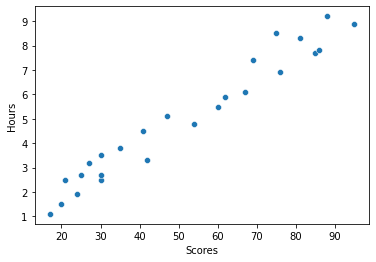

In [67]:
sns.scatterplot(data=df,x='Scores',y='Hours')

In [68]:
x=df['Scores']
y=df['Hours']

In [69]:
x=np.array(x).reshape(-1,1)

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=7)

In [178]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [179]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [180]:
print('Mean Squared Error for Train data = ',mean_squared_error(y_train,y_train_pred))
print('Root Mean Squared Error for Training data = ',mean_squared_error(y_train,y_train_pred,squared=False))

Mean Squared Error for Train data =  0.2870949220396124
Root Mean Squared Error for Training data =  0.5358123944438131


In [181]:
print('Mean Squared Error Test data = ',mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error for Test data = ',mean_squared_error(y_test,y_test_pred,squared=False))

Mean Squared Error Test data =  0.31106246390183223
Root Mean Squared Error for Test data =  0.5577297409156448


In [182]:
print("r2 for Training data is " ,r2_score(y_train , y_train_pred) )
print("r2 for Test data test is " ,r2_score(y_test , y_test_pred) )

r2 for Training data is  0.9557035985265413
r2 for Test data test is  0.8922727397742573


In [183]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.1)

In [184]:
y_train_pred_lasso = lasso_model.predict(x_train)
y_test_pred_lasso = lasso_model.predict(x_test)

In [185]:
print("r2 for Training data is " ,r2_score(y_train , y_train_pred_lasso) )
print("r2 for Test data test is " ,r2_score(y_test , y_test_pred_lasso) )

r2 for Training data is  0.9557012967384333
r2 for Test data test is  0.8916886144210879


# Even I used Lasso there still overfitting because the dataset is too small

In [192]:
import matplotlib.pyplot as plt
from matplotlib import style 

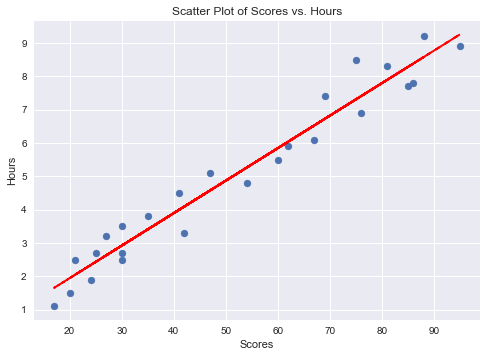

In [213]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have the Lasso model and predictions (y_pred) from the previous code

# Extract two data columns for plotting
x_values = df['Scores']
y_values = df['Hours']

# Create a scatter plot of the two data columns
plt.scatter(x_values, y_values)
plt.xlabel("Scores")
plt.ylabel("Hours")
plt.title("Scatter Plot of Scores vs. Hours")

# Fit a linear regression line (best-fitting line) to the data
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plot the best-fitting line
plt.plot(x_values, slope * x_values + intercept, color='red', linestyle='--', linewidth=2)

plt.show()
